In [1]:
import pandas as pd
import numpy as np
import warnings


In [3]:
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("ml-100k/u.data",sep="\t",names=['user_id','item_id','rating','timestamp'])

In [11]:
movies_title=pd.read_csv("ml-100k/u.item",sep="\|",header=None)

In [15]:
movies_title=movies_title[[0,1]]

In [16]:
movies_title.columns=['item_id','title']

In [19]:
df=pd.merge(df,movies_title,on='item_id')

In [20]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df.groupby('title').count()['rating']

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [24]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [26]:
ratings['num_of_ratings']=df.groupby('title').count()['rating']

In [46]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [27]:
ratings

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


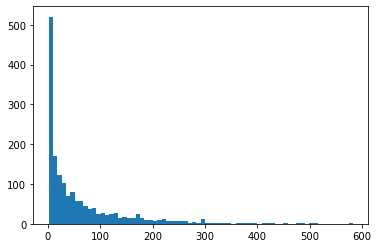

In [29]:
plt.figure()
plt.hist(ratings['num_of_ratings'],bins=70)
plt.show()

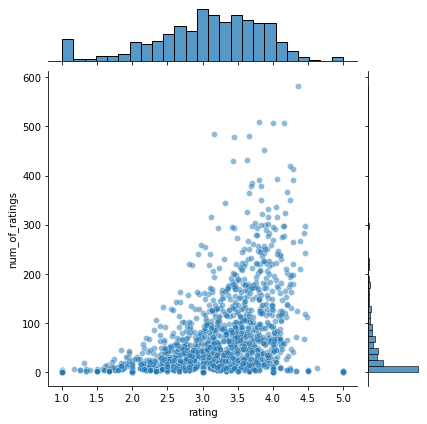

In [31]:
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha=0.5)

In [33]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')

In [34]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
starwar_user_rating=moviemat['Star Wars (1977)']

In [37]:
corr_starwars=pd.DataFrame(moviemat.corrwith(starwar_user_rating),columns=['correlation'])

In [39]:
corr_starwars.dropna(inplace=True)

In [41]:
corr_starwars.join(ratings['num_of_ratings'])

,correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [42]:
def predict_movies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar=moviemat.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['num_of_ratings'])
    predictions=corr_movie[corr_movie['num_of_ratings']>100].sort_values('correlation',ascending=False)
    return predictions
    
    

In [44]:
predict_movies('Abyss, The (1989)')

,correlation,num_of_ratings
title,,
"Abyss, The (1989)",1.000000,151
William Shakespeare's Romeo and Juliet (1996),0.609130,106
Ghost (1990),0.578579,170
Singin' in the Rain (1952),0.558353,137
Amistad (1997),0.517769,124
...,...,...
"Long Kiss Goodnight, The (1996)",-0.124850,185
Lost Highway (1997),-0.147641,125
"Ice Storm, The (1997)",-0.168280,108
